<a href="https://colab.research.google.com/github/igorpontes/GLO-7050/blob/develop/mini_projet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini-projet 1**

Imports

In [23]:
import numpy as np
import matplotlib.pyplot as plt

**1 Sélection de modèle**

In [24]:
#import CSV file and chose only the two first columns
ds1_train = np.loadtxt("Dataset_1_train.csv", delimiter=",", usecols=range(2))
ds1_test = np.loadtxt("Dataset_1_test.csv", delimiter=",", usecols=range(2))
ds1_valid = np.loadtxt("Dataset_1_valid.csv", delimiter=",", usecols=range(2))

Separate points

In [25]:
ds1_train_X = ds1_train[:,0]
ds1_train_Y = ds1_train[:,1]

ds1_test_X = ds1_test[:,0]
ds1_test_Y = ds1_test[:,1]

ds1_valid_X = ds1_valid[:,0]
ds1_valid_Y = ds1_valid[:,1]

Plotting dataset

In [26]:
def plotting_points(x , y, title):
  plt.figure(figsize=(10, 5))
  plt.scatter(x, y, s=15)
  plt.title(title)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

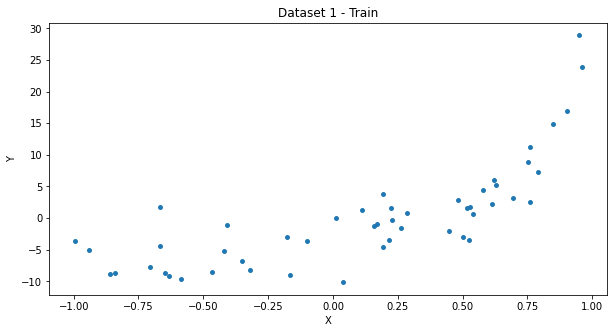

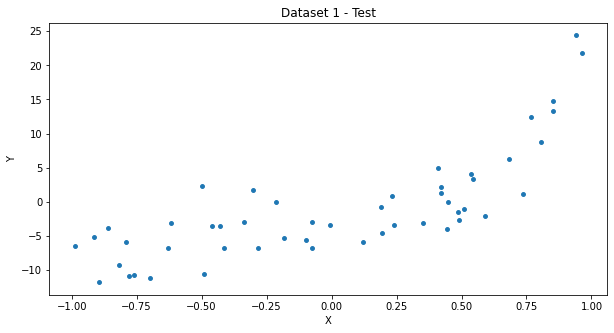

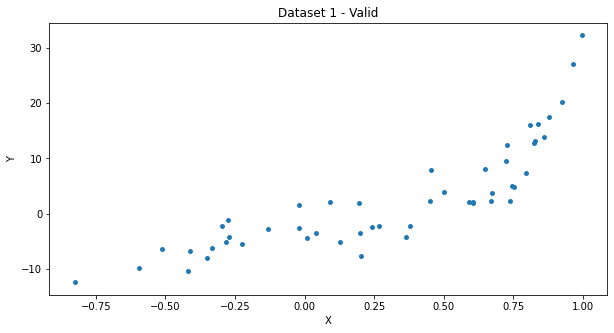

In [27]:
plotting_points(ds1_train_X, ds1_train_Y, "Dataset 1 - Train")
plotting_points(ds1_test_X, ds1_test_Y, "Dataset 1 - Test")
plotting_points(ds1_valid_X, ds1_valid_Y, "Dataset 1 - Valid")

Functions to calculate:
- Vandermonde Matrix
- Mean square error (MSE)
- Beta

In [79]:
def get_vandermonde_matrix(ds, degree):
  return np.polynomial.polynomial.polyvander(ds, degree)

def mean_square_error(Y_true, Y_pred):
  return np.square(np.subtract(Y_true,Y_pred)).mean() 

def calc_beta(X, y):
  '''solution for linear regression'''
  b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  #b = np.linalg.solve((X.T @ X),X.T @ y)
  return b

def calc_beta_reg(X, y, lamda = 1):
  '''solution for ridge regression'''
  m,n = X.shape
  I = np.eye((n))
  b = (np.linalg.inv(X.T.dot(X))+ lamda * I).dot(X.T).dot(y)#[:,0]
  return b

In [64]:
def trained_beta(x, y):
  # Vandermonde matrix
  X = get_vandermonde_matrix(x, 20)

  beta = calc_beta(X, y)
  beta = np.asmatrix(beta).T
  return beta

def trained_beta_reg(x, y, lamda):
  # Vandermonde matrix
  X = get_vandermonde_matrix(x, 20)

  beta = calc_beta_reg(X, y, lamda)
  beta = np.asmatrix(beta).T
  return beta

def get_y_pred(x, beta):
  X = get_vandermonde_matrix(x, 20)
  return (X*beta).A1

In [30]:
x = ds1_train[:,0]
y = ds1_train[:,1]

beta = trained_beta(x,y)
# Predict y
y_pred = get_y_pred(x,beta)

MSE_train = mean_square_error(y, y_pred)
print("Mean squared error on the training set:", MSE_train)


Mean squared error on the training set: 6.4747564103155035


In [31]:
x = ds1_test[:,0]
y = ds1_test[:,1]

# Predict y
y_pred = get_y_pred(x,beta)

MSE_test = mean_square_error(y, y_pred)
print("Mean squared error on the test set:", MSE_test)


Mean squared error on the test set: 51.1801271723127


In [32]:
x = ds1_valid[:,0]
y = ds1_valid[:,1]

beta = trained_beta(x,y)
# Predict y
y_pred = get_y_pred(x,beta)

MSE_valid = mean_square_error(y, y_pred)
print("Mean squared error on the training set:", MSE_valid)

Mean squared error on the training set: 1246.1230525158671


In [46]:
def get_polynomial_function(beta):
  return np.poly1d(np.squeeze(np.asarray(beta)))

poly_f = get_polynomial_function(beta)
print("Polynomial function: ")
print(poly_f)

Polynomial function: 
       20         19        18        17             16             15
16.81 x  + 141.3 x  + 1514 x  - 8936 x  - 9.378e+04 x  + 3.131e+05 x 
              14             13             12             11
 + 1.829e+06 x  - 6.135e+06 x  - 1.508e+07 x  + 6.284e+07 x 
              10             9             8             7
 + 4.292e+07 x  - 3.393e+08 x + 1.094e+08 x + 9.121e+08 x
              6             5             4             3             2
 - 9.465e+08 x - 9.099e+08 x + 1.927e+09 x - 4.225e+08 x - 1.104e+09 x + 8.987e+08 x - 2.125e+08


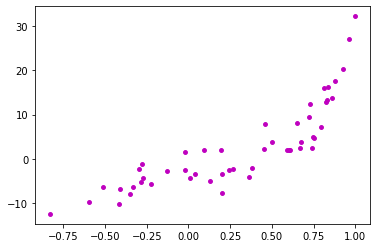

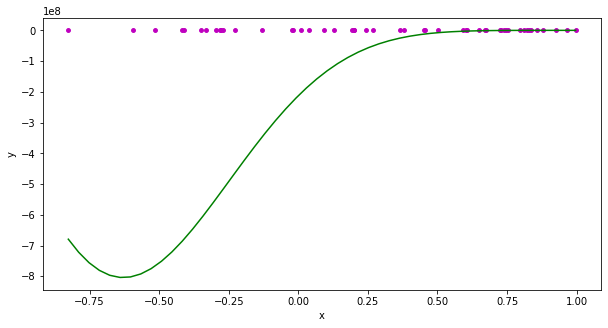

In [60]:

def plot_regression_line(x, y, b): 
    plt.figure(figsize=(10, 5))
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 15) 

    x_line = np.linspace(x.min(), x.max(), 50)
    poly_func = get_polynomial_function(b)
    regression_line = poly_func(x_line)
    # Plotting the regression line 
    plt.plot(x_line, regression_line, color = "g") 
    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y')     

plt.scatter(x, y, color = "m", 
            marker = "o", s = 15) 
plot_regression_line(x, y, beta)
plt.show() 
#print(x)


## Regularization L2

- Train

In [80]:
x = ds1_train[:,0]
y = ds1_train[:,1]

beta = trained_beta_reg(x,y, 0.5)
# Predict y
y_pred = get_y_pred(x,beta)

MSE_train = mean_square_error(y, y_pred)
print("Mean squared error on the training set:", MSE_train)


Mean squared error on the training set: 14098.139227537957


- Valid

In [81]:
x = ds1_valid[:,0]
y = ds1_valid[:,1]

beta = trained_beta_reg(x,y, 0.5)
# Predict y
y_pred = get_y_pred(x,beta)

MSE_train = mean_square_error(y, y_pred)
print("Mean squared error on the valid set:", MSE_train)


Mean squared error on the valid set: 64515.32271304754


**2 Descente de gradient pour la régression**



In [ ]:
#import CSV file and chose only the two first columns
ds2_train = np.loadtxt("Dataset_2_train.csv", delimiter=",", usecols=range(2))
ds2_test = np.loadtxt("Dataset_2_test.csv", delimiter=",", usecols=range(2))
ds2_valid = np.loadtxt("Dataset_2_valid.csv", delimiter=",", usecols=range(2))

**3 Dataset issu de la "vie réelle"**

In [ ]:
#import CSV file and chose only the two first columns
ds3 = np.genfromtxt("communities.data", delimiter=",", dtype="str")

In [ ]:
print(ds3[1])

['53' '?' '?' 'Tukwilacity' '1' '0' '0.16' '0.12' '0.74' '0.45' '0.07'
 '0.26' '0.59' '0.35' '0.27' '0.02' '1' '0.31' '0.72' '0.11' '0.45' '0.25'
 '0.29' '0.39' '0.29' '0.37' '0.38' '0.33' '0.16' '0.3' '0.22' '0.35'
 '0.01' '0.24' '0.14' '0.24' '0.3' '0.27' '0.73' '0.57' '0.15' '0.42'
 '0.36' '1' '0.63' '0.91' '1' '0.29' '0.43' '0.47' '0.6' '0.39' '0.46'
 '0.53' '0' '0.24' '0.01' '0.52' '0.62' '0.64' '0.63' '0.25' '0.27' '0.25'
 '0.23' '0.84' '0.1' '0.16' '0.1' '0.17' '0.29' '0.17' '0.26' '0.2' '0.82'
 '0' '0.02' '0.79' '0.24' '0.02' '0.25' '0.65' '0.16' '0' '0.21' '0.2'
 '0.21' '0.42' '0.38' '0.4' '0.37' '0.29' '0.32' '0.18' '0' '0' '0.21'
 '0.5' '0.34' '0.6' '0.52' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?' '?'
 '?' '?' '?' '?' '?' '0.02' '0.12' '0.45' '?' '?' '?' '?' '0' '?' '0.67']
